In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('heart.csv')

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data_dup=data.duplicated().any()

In [6]:
data_dup

True

In [7]:
data = data.drop_duplicates()

In [8]:
data.duplicated().any()

False

In [11]:
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [13]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [14]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [17]:
cate_val.remove('sex')

ValueError: list.remove(x): x not in list

In [18]:
cate_val

['cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [20]:
cate_val.remove('output')

ValueError: list.remove(x): x not in list

In [21]:
data=pd.get_dummies(data,columns = cate_val, drop_first=True)

In [22]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
st=StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [25]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [26]:
X=data.drop('output',axis=1)

In [27]:
y=data['output']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred1=log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

In [35]:
from sklearn import svm

In [36]:
svm=svm.SVC()

In [37]:
svm.fit(X_train,y_train)

SVC()

In [38]:
y_pred2=svm.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn= KNeighborsClassifier()

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred3=knn.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [45]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [46]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


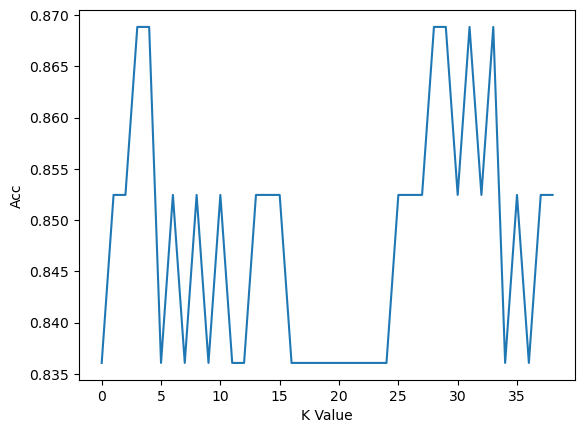

In [48]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [58]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8688524590163934

In [59]:
data=pd.read_csv('heart.csv')

In [60]:
data=data.drop_duplicates()

In [61]:
X=data.drop('output',axis=1)
y=data['output']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt=DecisionTreeClassifier()

In [65]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred4=dt.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred4)

0.819672131147541

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier()

In [70]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
y_pred5=rf.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbc=GradientBoostingClassifier()

In [75]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [76]:
y_pred6=gbc.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [78]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                        'ACC':[accuracy_score(y_test,y_pred1)*100,
                              accuracy_score(y_test,y_pred2)*100,
                              accuracy_score(y_test,y_pred3)*100,
                              accuracy_score(y_test,y_pred4)*100,
                              accuracy_score(y_test,y_pred5)*100,
                              accuracy_score(y_test,y_pred6)*100,]})

In [80]:
final_data

,Models,ACC
0,LR,90.163934
1,SVM,86.885246
2,KNN,86.885246
3,DT,81.967213
4,RF,85.245902
5,GB,85.245902


In [81]:
import seaborn as sns

In [86]:
sns.barplot(final_data['Models'],final_data['ACC'])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [87]:
X=data.drop('output',axis=1)
y=data['output']

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
log=LogisticRegression()
log.fit(X,y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
import pandas as pd

In [92]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trtbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalachh':168,
    'exng':0,
    'oldpeak':1.0,
    'slp':2,
    'caa':2,
    'thall':3,
},index=[0])

In [93]:
new_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [95]:
p=log.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [96]:
import joblib

In [97]:
joblib.dump(log,'model_joblib_heart')

['model_joblib_heart']

In [98]:
model=joblib.load('model_joblib_heart')

In [99]:
model.predict(new_data)

array([0], dtype=int64)

In [105]:
from tkinter import *
import joblib

In [118]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [103]:
print("hello")

hello


In [119]:
import seaborn as sns

In [120]:
sns.barplot(final_data['Models'],final_data['ACC'])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
classifier=GaussianNB()

In [123]:
classifier.fit(X_train,y_train)

GaussianNB()

In [124]:
y_pred7=classifier.predict(X_test)

In [125]:
accuracy_score(y_test,y_pred7)

0.8852459016393442